## Introduction

This notebook presents an analysis of the 2020 Total Cohort graduation rates in New York City (NYC) high schools. Utilizing data from the provided CSV file, the analysis aims to explore and compare graduation outcomes across different types of high schools in NYC: Specialized High Schools, Core High Schools, and Charter High Schools.

A key focus of this analysis is to understand how graduation rates and student outcomes vary for specific subgroups of students, including Economically Disadvantaged students, Students with Disabilities, Homeless students, and students in Foster Care. By examining the representation of these subgroups in different school types and their respective graduation rates and post-secondary outcomes, we aim to shed light on potential disparities and gain insights into the educational landscape of NYC high schools.

The analysis will involve:
- Loading and preparing the graduation rate data.
- Categorizing schools into Specialized, Core, and Charter types.
- Comparing the representation of key subgroups across these school types.
- Analyzing and visualizing the average graduation rates for 'All Students' and the selected subgroups in each school type.
- Exploring the distribution of student outcomes (diplomas, still enrolled, dropout, etc.) in different school types, including a localized analysis for Kings County.
- Discussing the key findings and drawing conclusions based on the data.

This analysis seeks to provide a data-driven perspective on graduation trends and outcomes for diverse student populations within NYC high schools.

In [94]:
import pandas as pd

#Load CSV
df = pd.read_csv('/content/2024_graduation_rate.csv', low_memory=False)

In [95]:
#Selected subgroups
subgroups = [
    'All Students',
    'Students with Disabilities',
    'Economically Disadvantaged',
    'Homeless',
    'In Foster Care'
    ]

Some of the subgroups may not be sufficiently self-explanatory.

#From the 2024 Glossary of Terms – High School Graduation Rate

Economically Disadvantaged:  
Student who participates in, or whose family participates in, economic assistance programs, such as the  Free or Reduced-Price Lunch Programs; Social Security Insurance (SSI); Supplemental Nutrition  Assistance Program (SNAP); Foster Care; Refugee Assistance (cash or medical assistance); Earned  Income Tax Credit (EITC); Home Energy Assistance Program (HEAP); Safety Net Assistance (SNA); Bureau of Indian Affairs (BIA); or Family Assistance: Temporary Assistance for Needy Families (TANF). If one student in a family is identified as low income, all students from that household (economic unit) may be identified as low income.

Students with Disabilities:  
Student classified by the Committee on Special Education as having one or more disabilities.    

In [96]:
#Filtering Constant
COHORT = '2020 Total Cohort - 4 Year Outcome - August 2024'

chaff_columns = [
    'report_school_year',
    'aggregation_index',
    'INSTITUTION_ID',
    'aggregation_code',
    'lea_beds',
    'lea_name',
    'boces_code',
    'boces_name',]

post_processing_columns = [
    'aggregation_type',
    'nrc_code',
    'nrc_desc',
    'membership_code',
    'membership_desc',
    'nyc_ind',
  ]

#carving these schools out of NYC schools for further analysis
#Also, some names on in the CSV are weird, so this is a translator too
specialized_high_schools = {
  'BRONX HIGH SCHOOL OF SCIENCE (THE)': "Bronx High School of Science",
  'BROOKLYN LATIN SCHOOL (THE)': "Brooklyn Latin School",
  'BROOKLYN TECHNICAL HIGH SCHOOL': "Brooklyn Technical High School",
  'FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSI': "Fiorello H. LaGuardia High School of Music and Art and Performing Arts",
  'HIGH SCHOOL MATHEMATICS  SCIENCE AND ENG': 'High School for Math, Science and Engineering at City College',
  'HIGH SCHOOL OF AMERICAN STUDIES AT LEHMA': 'High School of American Studies at Lehman College',
  'QUEENS HIGH SCHOOL FOR THE SCIENCES AT Y': 'Queens High School for the Sciences at York College',
  'STATEN ISLAND TECHNICAL HIGH SCHOOL': 'Staten Island Technical High School',
  'STUYVESANT HIGH SCHOOL': 'Stuyvesant High School'
  }

In [97]:
def drop_columns(df, columns):
  try:
    df = df.drop(columns=columns)
  except:
    pass
  return df

In [98]:
# drop unnecessary columns
df = drop_columns(df, chaff_columns)

#filter on school, cohort, NYC, and selected subgroups
df_nyc = df[
    (df['aggregation_type'] == 'School') &
    (df['membership_desc'] == COHORT) &
    (df['nyc_ind'] == 1) &
    (df['subgroup_name'].isin(subgroups))
    ]
display(df_nyc.head())

,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_code,membership_desc,subgroup_code,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
122218,School,ORCHARD COLLEGIATE ACADEMY,1.0,NYC,31.0,NEW YORK,1.0,11,2020 Total Cohort - 4 Year Outcome - August 2024,1,...,16,21%,0,0%,4,5%,0,0%,1,1%
122270,School,ORCHARD COLLEGIATE ACADEMY,1.0,NYC,31.0,NEW YORK,1.0,11,2020 Total Cohort - 4 Year Outcome - August 2024,11,...,0,0%,0,0%,0,0%,0,0%,1,8%
122288,School,ORCHARD COLLEGIATE ACADEMY,1.0,NYC,31.0,NEW YORK,1.0,11,2020 Total Cohort - 4 Year Outcome - August 2024,15,...,9,16%,0,0%,3,5%,0,0%,1,2%
122306,School,ORCHARD COLLEGIATE ACADEMY,1.0,NYC,31.0,NEW YORK,1.0,11,2020 Total Cohort - 4 Year Outcome - August 2024,20,...,0,0%,0,0%,2,20%,0,0%,0,0%
122332,School,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1.0,NYC,31.0,NEW YORK,1.0,11,2020 Total Cohort - 4 Year Outcome - August 2024,1,...,32,26%,0,0%,0,0%,1,1%,3,2%


In [99]:
nyc_charter_high_schools = df_nyc[(df_nyc['nrc_desc'] == 'Charters')]
# drop unnecessary columns
nyc_charter_high_schools = drop_columns(nyc_charter_high_schools, post_processing_columns)
display(nyc_charter_high_schools.head())

,aggregation_name,county_code,county_name,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
131174,JOHN V LINDSAY WILDCAT ACADEMY CS,31.0,NEW YORK,1,All Students,175,50,29%,6,3%,...,0,0%,0,0%,116,66%,5,3%,3,2%
131234,JOHN V LINDSAY WILDCAT ACADEMY CS,31.0,NEW YORK,11,Students with Disabilities,61,13,21%,6,10%,...,0,0%,0,0%,45,74%,2,3%,1,2%
131252,JOHN V LINDSAY WILDCAT ACADEMY CS,31.0,NEW YORK,15,Economically Disadvantaged,161,43,27%,6,4%,...,0,0%,0,0%,110,68%,5,3%,3,2%
131270,JOHN V LINDSAY WILDCAT ACADEMY CS,31.0,NEW YORK,20,Homeless,32,8,25%,2,6%,...,0,0%,0,0%,23,72%,1,3%,0,0%
131282,JOHN V LINDSAY WILDCAT ACADEMY CS,31.0,NEW YORK,22,In Foster Care,5,1,20%,0,0%,...,0,0%,0,0%,4,80%,0,0%,0,0%


In [100]:
nyc_specialized_high_schools = df_nyc[(df_nyc['aggregation_name'].isin(specialized_high_schools))]
nyc_specialized_high_schools = drop_columns(nyc_specialized_high_schools, post_processing_columns)
display(nyc_specialized_high_schools.head())

,aggregation_name,county_code,county_name,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
127920,STUYVESANT HIGH SCHOOL,31.0,NEW YORK,1,All Students,804,792,99%,0,0%,...,751,93%,0,0%,12,1%,0,0%,0,0%
127980,STUYVESANT HIGH SCHOOL,31.0,NEW YORK,11,Students with Disabilities,14,13,93%,0,0%,...,10,71%,0,0%,1,7%,0,0%,0,0%
127992,STUYVESANT HIGH SCHOOL,31.0,NEW YORK,15,Economically Disadvantaged,423,416,98%,0,0%,...,385,91%,0,0%,7,2%,0,0%,0,0%
128010,STUYVESANT HIGH SCHOOL,31.0,NEW YORK,20,Homeless,19,16,84%,0,0%,...,16,84%,0,0%,3,16%,0,0%,0,0%
132376,FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSI,31.0,NEW YORK,1,All Students,440,432,98%,0,0%,...,273,62%,0,0%,6,1%,0,0%,2,0%


In [101]:
nyc_core_high_schools = df_nyc[
    (~df_nyc['aggregation_name'].isin(specialized_high_schools)) &
    (df_nyc['nrc_desc'] != 'Charters')
    ]
nyc_core_high_schools  = drop_columns(nyc_core_high_schools , post_processing_columns)
display(nyc_core_high_schools)

,aggregation_name,county_code,county_name,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
122218,ORCHARD COLLEGIATE ACADEMY,31.0,NEW YORK,1,All Students,75,70,93%,0,0%,...,16,21%,0,0%,4,5%,0,0%,1,1%
122270,ORCHARD COLLEGIATE ACADEMY,31.0,NEW YORK,11,Students with Disabilities,13,12,92%,0,0%,...,0,0%,0,0%,0,0%,0,0%,1,8%
122288,ORCHARD COLLEGIATE ACADEMY,31.0,NEW YORK,15,Economically Disadvantaged,57,53,93%,0,0%,...,9,16%,0,0%,3,5%,0,0%,1,2%
122306,ORCHARD COLLEGIATE ACADEMY,31.0,NEW YORK,20,Homeless,10,8,80%,0,0%,...,0,0%,0,0%,2,20%,0,0%,0,0%
122332,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,31.0,NEW YORK,1,All Students,124,120,97%,3,2%,...,32,26%,0,0%,0,0%,1,1%,3,2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182608,CONCORD HIGH SCHOOL,35.0,RICHMOND,22,In Foster Care,3,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
182626,RALPH R MCKEE CAREER AND TECHNICAL EDUCA,35.0,RICHMOND,1,All Students,162,134,83%,1,1%,...,60,37%,2,1%,16,10%,3,2%,7,4%
182684,RALPH R MCKEE CAREER AND TECHNICAL EDUCA,35.0,RICHMOND,11,Students with Disabilities,59,42,71%,1,2%,...,7,12%,2,3%,11,19%,1,2%,3,5%
182702,RALPH R MCKEE CAREER AND TECHNICAL EDUCA,35.0,RICHMOND,15,Economically Disadvantaged,120,93,78%,1,1%,...,40,33%,2,2%,15,13%,3,3%,7,6%


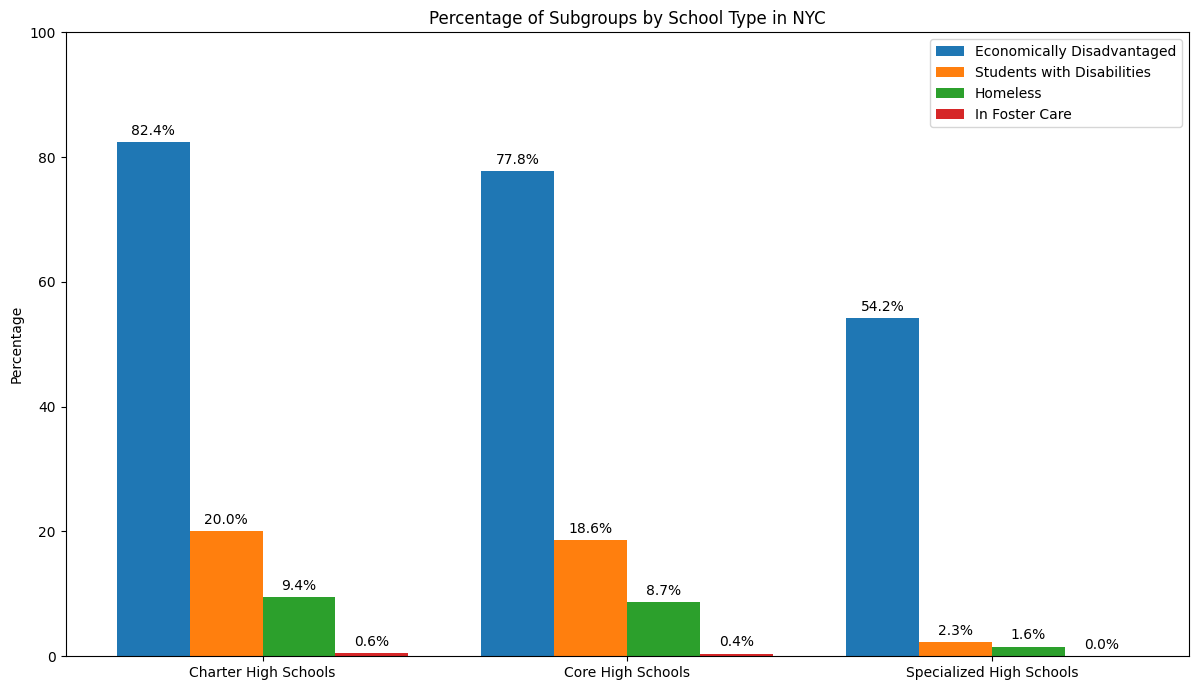

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to calculate percentage of a given subgroup (already defined, but including for clarity)
def calculate_subgroup_percentage(df, subgroup_name):
  subgroup_enrollment = df[df['subgroup_name'] == subgroup_name]['enroll_cnt'].sum()
  all_students_enrollment = df[df['subgroup_name'] == 'All Students']['enroll_cnt'].sum()
  if all_students_enrollment == 0:
    return 0
  return (subgroup_enrollment / all_students_enrollment) * 100

# Calculate percentages for all subgroups and school types
subgroup_percentages = {
    'Economically Disadvantaged': [
        calculate_subgroup_percentage(nyc_core_high_schools, 'Economically Disadvantaged'),
        calculate_subgroup_percentage(nyc_specialized_high_schools, 'Economically Disadvantaged'),
        calculate_subgroup_percentage(nyc_charter_high_schools, 'Economically Disadvantaged')
    ],
    'Students with Disabilities': [
        calculate_subgroup_percentage(nyc_core_high_schools, 'Students with Disabilities'),
        calculate_subgroup_percentage(nyc_specialized_high_schools, 'Students with Disabilities') ,
        calculate_subgroup_percentage(nyc_charter_high_schools, 'Students with Disabilities')
    ],
    'Homeless': [
        calculate_subgroup_percentage(nyc_core_high_schools, 'Homeless'),
        calculate_subgroup_percentage(nyc_specialized_high_schools, 'Homeless'),
        calculate_subgroup_percentage(nyc_charter_high_schools, 'Homeless')
    ],
    'In Foster Care': [
        calculate_subgroup_percentage(nyc_core_high_schools, 'In Foster Care'),
        calculate_subgroup_percentage(nyc_specialized_high_schools, 'In Foster Care'),
        calculate_subgroup_percentage(nyc_charter_high_schools, 'In Foster Care')
    ]
}

school_types = ['Core High Schools', 'Specialized High Schools', 'Charter High Schools']
subgroup_names = list(subgroup_percentages.keys())

# Reorder school types and corresponding percentages
school_types_reordered = ['Charter High Schools', 'Core High Schools', 'Specialized High Schools']
econ_disadvantaged_reordered = [subgroup_percentages['Economically Disadvantaged'][2], subgroup_percentages['Economically Disadvantaged'][0], subgroup_percentages['Economically Disadvantaged'][1]]
swd_reordered = [subgroup_percentages['Students with Disabilities'][2], subgroup_percentages['Students with Disabilities'][0], subgroup_percentages['Students with Disabilities'][1]]
homeless_reordered = [subgroup_percentages['Homeless'][2], subgroup_percentages['Homeless'][0], subgroup_percentages['Homeless'][1]]
foster_reordered = [subgroup_percentages['In Foster Care'][2], subgroup_percentages['In Foster Care'][0], subgroup_percentages['In Foster Care'][1]]


x = np.arange(len(school_types_reordered))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create grouped bars with reordered data
rects1 = ax.bar(x - 1.5*width, econ_disadvantaged_reordered, width, label='Economically Disadvantaged')
rects2 = ax.bar(x - 0.5*width, swd_reordered, width, label='Students with Disabilities')
rects3 = ax.bar(x + 0.5*width, homeless_reordered, width, label='Homeless')
rects4 = ax.bar(x + 1.5*width, foster_reordered, width, label='In Foster Care')


# Add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Subgroups by School Type in NYC')
ax.set_xticks(x)
ax.set_xticklabels(school_types_reordered)
ax.legend()

# Add percentage labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(f'{height:.1f}%'),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
plt.ylim(0, 100)
plt.show()

Looking at the combined bar chart, here are some patterns and observations:




*   Economically Disadvantaged Students: Charter High Schools have the highest percentage of economically disadvantaged students, followed closely by Core High Schools. Specialized High Schools have a significantly lower percentage of economically disadvantaged students compared to both Charter and Core schools.

*   Students with Disabilities: Similar to economically disadvantaged students, Charter High Schools and Core High Schools have a much higher percentage of students with disabilities compared to Specialized High Schools. The percentages in Charter and Core schools are relatively close.
*   Homeless Students: The percentage of homeless students is relatively low across all three school types. Charter High Schools have the highest percentage, followed by Core High Schools, and then Specialized High Schools with the lowest percentage.
*   Students in Foster Care: The percentage of students in foster care is the lowest among all the subgroups across all school types. Charter High Schools show a slightly higher percentage compared to Core and Specialized High Schools, which have very similar and low percentages.

The chart clearly shows that Specialized High Schools have a much lower representation of students from these specific subgroups (Economically Disadvantaged, Students with Disabilities, Homeless, and In Foster Care) compared to both Core and Charter High Schools. Charter High Schools generally have slightly higher percentages of these subgroups than Core High Schools, with the exception of Students with Disabilities where the percentages are very close.

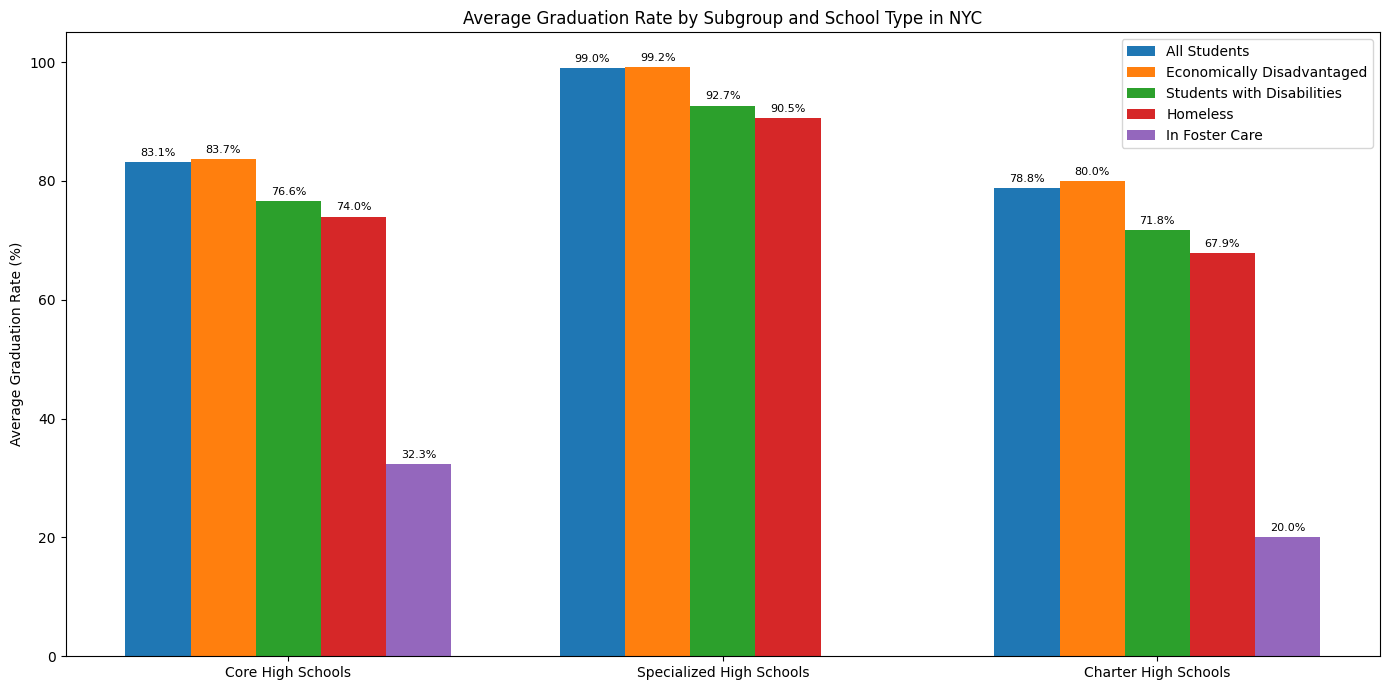

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to get the graduation rate for a specific subgroup in a dataframe (already defined, but including for clarity)
def get_subgroup_graduation_rate(df, subgroup_name):
  subgroup_df = df[df['subgroup_name'] == subgroup_name].copy() # Ensure we are working on a copy
  # Convert 'grad_pct' to numeric, coercing errors using .loc to avoid SettingWithCopyWarning
  subgroup_df.loc[:, 'grad_pct_numeric'] = pd.to_numeric(subgroup_df['grad_pct'].str.replace('%', ''), errors='coerce')
  # Calculate the average graduation rate, ignoring NaNs
  average_grad_rate = subgroup_df['grad_pct_numeric'].mean()
  return average_grad_rate

# Get graduation rates for all subgroups in each school type
subgroup_grad_rates = {
    'All Students': [
        get_subgroup_graduation_rate(nyc_core_high_schools, 'All Students'),
        get_subgroup_graduation_rate(nyc_specialized_high_schools, 'All Students'),
        get_subgroup_graduation_rate(nyc_charter_high_schools, 'All Students')
    ],
    'Economically Disadvantaged': [
        get_subgroup_graduation_rate(nyc_core_high_schools, 'Economically Disadvantaged'),
        get_subgroup_graduation_rate(nyc_specialized_high_schools, 'Economically Disadvantaged'),
        get_subgroup_graduation_rate(nyc_charter_high_schools, 'Economically Disadvantaged')
    ],
    'Students with Disabilities': [
        get_subgroup_graduation_rate(nyc_core_high_schools, 'Students with Disabilities'),
        get_subgroup_graduation_rate(nyc_specialized_high_schools, 'Students with Disabilities'),
        get_subgroup_graduation_rate(nyc_charter_high_schools, 'Students with Disabilities')
    ],
    'Homeless': [
        get_subgroup_graduation_rate(nyc_core_high_schools, 'Homeless'),
        get_subgroup_graduation_rate(nyc_specialized_high_schools, 'Homeless'),
        get_subgroup_graduation_rate(nyc_charter_high_schools, 'Homeless')
    ],
    'In Foster Care': [
        get_subgroup_graduation_rate(nyc_core_high_schools, 'In Foster Care'),
        get_subgroup_graduation_rate(nyc_specialized_high_schools, 'In Foster Care'),
        get_subgroup_graduation_rate(nyc_charter_high_schools, 'In Foster Care')
    ]
}

# Debugging prints for Economically Disadvantaged in Specialized High Schools - removing now that typo is fixed
# print("Specialized High Schools - Economically Disadvantaged dataframe:")
# print(nyc_specialized_high_schools[nyc_specialized_high_schools['subgroup_name'] == 'Economically Disadvantaged'])
# print("\nGraduation rate for Economically Disadvantaged in Specialized High Schools:")
# print(get_subgroup_graduation_rate(nyc_specialized_high_schools, 'Economically Disadvantaged'))


school_types = ['Core High Schools', 'Specialized High Schools', 'Charter High Schools']
subgroup_names = list(subgroup_grad_rates.keys())

x = np.arange(len(school_types))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

# Create grouped bars for graduation rates
rects0 = ax.bar(x - 2*width, subgroup_grad_rates['All Students'], width, label='All Students')
rects1 = ax.bar(x - 1*width, subgroup_grad_rates['Economically Disadvantaged'], width, label='Economically Disadvantaged')
rects2 = ax.bar(x + 0*width, subgroup_grad_rates['Students with Disabilities'], width, label='Students with Disabilities')
rects3 = ax.bar(x + 1*width, subgroup_grad_rates['Homeless'], width, label='Homeless')
rects4 = ax.bar(x + 2*width, subgroup_grad_rates['In Foster Care'], width, label='In Foster Care')


# Add some text for labels, title and axes ticks
ax.set_ylabel('Average Graduation Rate (%)')
ax.set_title('Average Graduation Rate by Subgroup and School Type in NYC')
ax.set_xticks(x)
ax.set_xticklabels(school_types)
ax.legend()

# Add percentage labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(f'{height:.1f}%'),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
plt.ylim(0, 105) # Adjusted ylim to accommodate labels
plt.show()

Comparison of Subgroup Graduation Rates Across School Types:



*   For 'Economically Disadvantaged' students, Specialized High Schools have a much higher graduation rate than both Core and Charter High Schools. Core and Charter High Schools have relatively similar graduation rates for this subgroup.

*   For 'Students with Disabilities' and 'Homeless' students, Specialized High Schools again show significantly higher graduation rates compared to Core and Charter High Schools. Core and Charter High Schools have somewhat similar graduation rates for these subgroups, though there might be slight variations.

*   For students 'In Foster Care', the graduation rates in both Core and Charter High Schools are considerably lower than the rates for other subgroups and 'All Students' in those school types. Data for this subgroup is not available for Specialized High Schools.

The chart highlights the high overall graduation rates in Specialized High Schools, where subgroup disparities appear minimal among the included subgroups. In contrast, Core and Charter High Schools show a noticeable disparity in graduation rates between 'All Students' and the analyzed subgroups, with 'In Foster Care' and 'Homeless' students facing the lowest graduation rates.






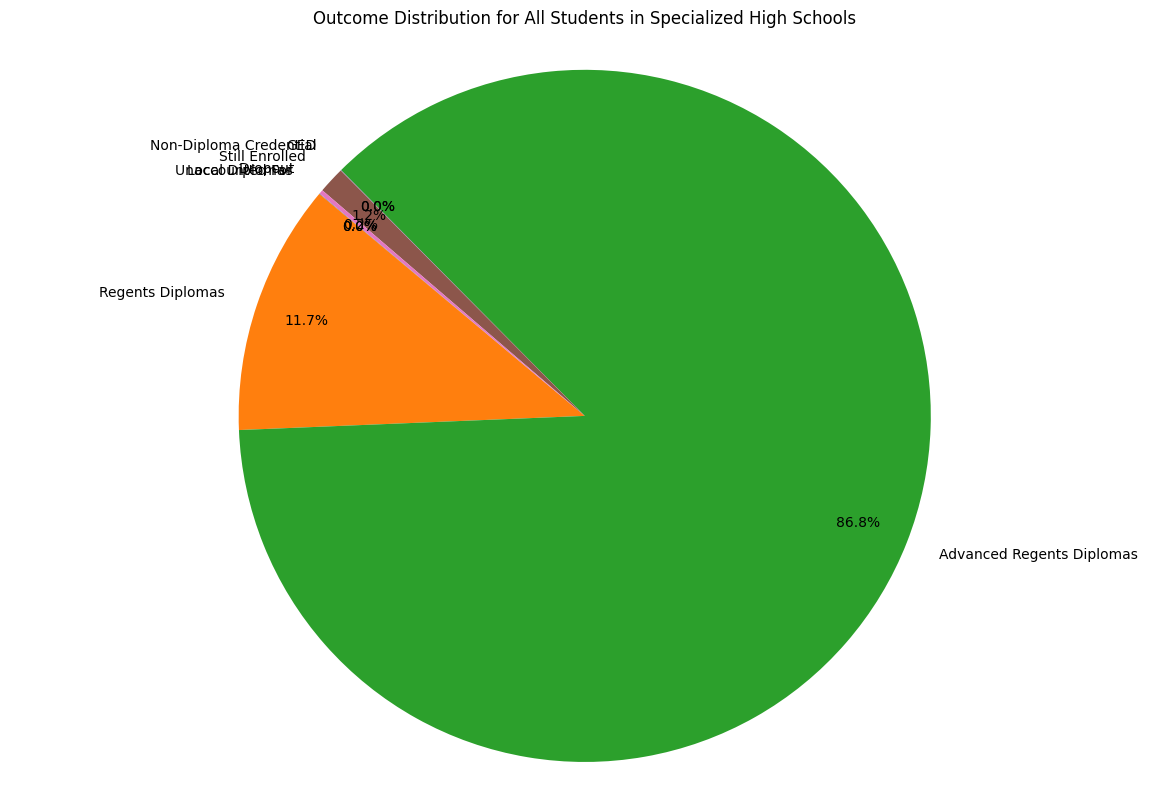

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for numerical operations


# Filter for 'All Students' in Specialized High Schools
specialized_all_students = nyc_specialized_high_schools[nyc_specialized_high_schools['subgroup_name'] == 'All Students'].copy()

# Define the outcome columns and their corresponding labels
outcome_columns = {
    'local_cnt': 'Local Diplomas',
    'reg_cnt': 'Regents Diplomas',
    'reg_adv_cnt': 'Advanced Regents Diplomas',
    'non_diploma_credential_cnt': 'Non-Diploma Credential',
    'ged_cnt': 'GED',
    'still_enr_cnt': 'Still Enrolled',
    'dropout_cnt': 'Dropout'
}

# Calculate the total count for each outcome across all specialized high schools for 'All Students'
outcome_counts = {}
for col, label in outcome_columns.items():
    # Convert column to numeric, coercing errors, then sum
    specialized_all_students[col] = pd.to_numeric(specialized_all_students[col], errors='coerce').fillna(0)
    outcome_counts[label] = specialized_all_students[col].sum()

# Calculate 'unaccounted for' count
total_enrolled = specialized_all_students['enroll_cnt'].sum()
accounted_for = sum(outcome_counts.values())
unaccounted_for_count = total_enrolled - accounted_for
outcome_counts['Unaccounted For'] = unaccounted_for_count

# Prepare data for the pie chart
labels = list(outcome_counts.keys()) # Convert keys to a list
sizes = list(outcome_counts.values()) # Convert values to a list

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)


ax.set_title('Outcome Distribution for All Students in Specialized High Schools', pad=20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

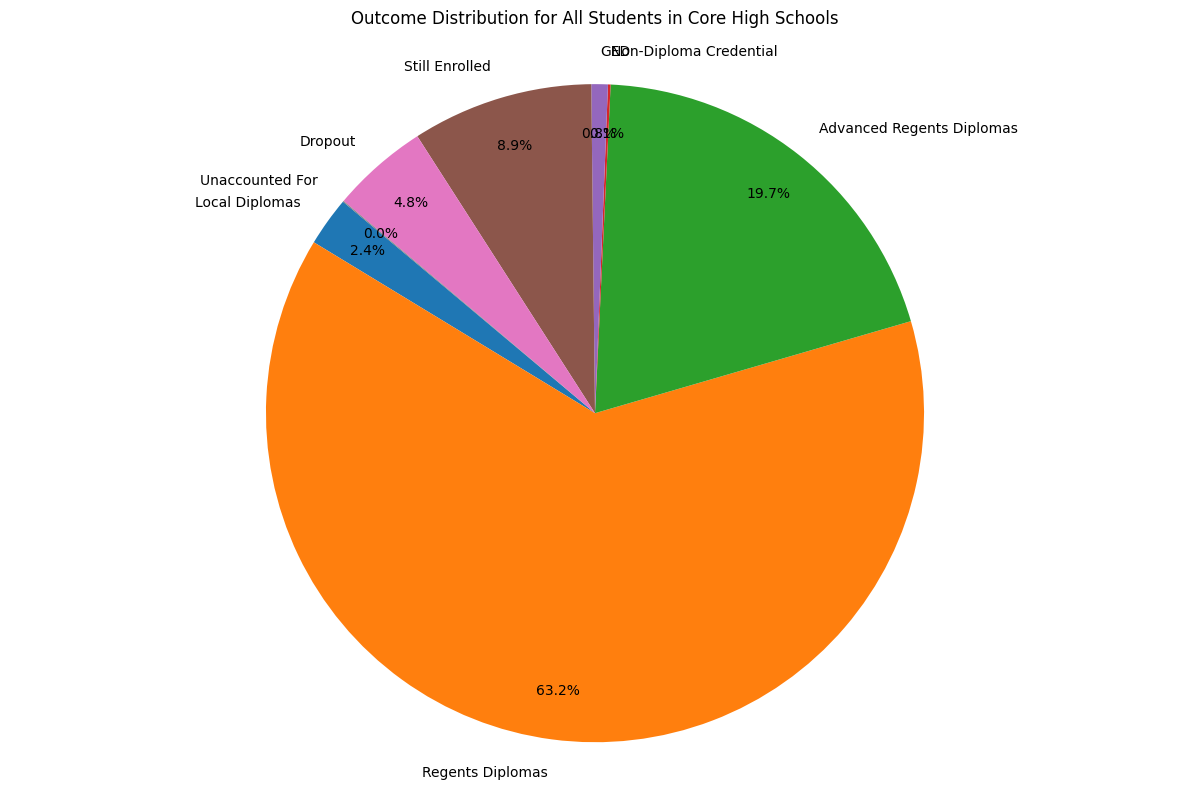

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for 'All Students' in Core High Schools
core_all_students = nyc_core_high_schools[nyc_core_high_schools['subgroup_name'] == 'All Students'].copy()

# Define the outcome columns and their corresponding labels
outcome_columns = {
    'local_cnt': 'Local Diplomas',
    'reg_cnt': 'Regents Diplomas',
    'reg_adv_cnt': 'Advanced Regents Diplomas',
    'non_diploma_credential_cnt': 'Non-Diploma Credential',
    'ged_cnt': 'GED',
    'still_enr_cnt': 'Still Enrolled',
    'dropout_cnt': 'Dropout'
}

# Calculate the total count for each outcome across all core high schools for 'All Students'
core_outcome_counts = {}
for col, label in outcome_columns.items():
    # Convert column to numeric, coercing errors, then sum
    core_all_students[col] = pd.to_numeric(core_all_students[col], errors='coerce').fillna(0)
    core_outcome_counts[label] = core_all_students[col].sum()

# Calculate 'unaccounted for' count
core_total_enrolled = core_all_students['enroll_cnt'].sum()
core_accounted_for = sum(core_outcome_counts.values())
core_unaccounted_for_count = core_total_enrolled - core_accounted_for
core_outcome_counts['Unaccounted For'] = core_unaccounted_for_count

# Prepare data for the pie chart
core_labels = core_outcome_counts.keys()
core_sizes = core_outcome_counts.values()

# Create the pie chart with improved label placement
plt.figure(figsize=(12, 8))
plt.pie(core_sizes, labels=core_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Outcome Distribution for All Students in Core High Schools', pad=20) # Increased pad
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

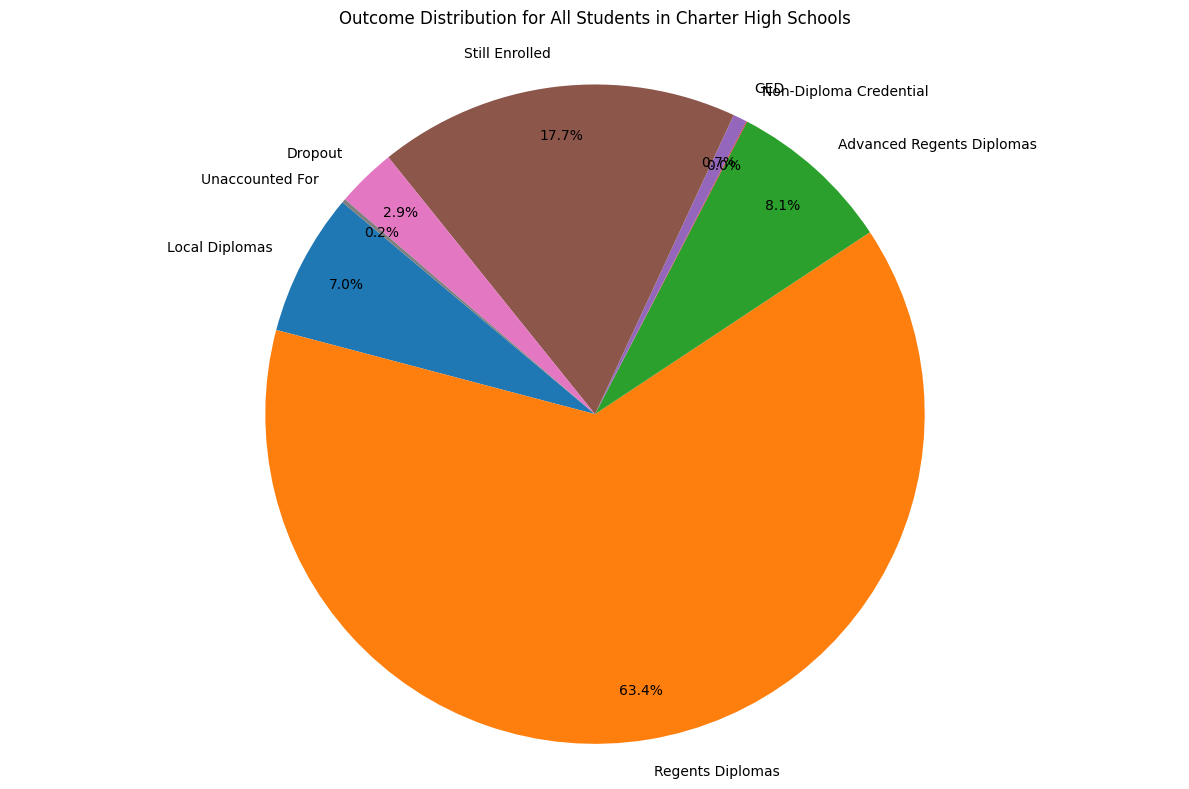

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for 'All Students' in Charter High Schools
charter_all_students = nyc_charter_high_schools[nyc_charter_high_schools['subgroup_name'] == 'All Students'].copy()

# Define the outcome columns and their corresponding labels
outcome_columns = {
    'local_cnt': 'Local Diplomas',
    'reg_cnt': 'Regents Diplomas',
    'reg_adv_cnt': 'Advanced Regents Diplomas',
    'non_diploma_credential_cnt': 'Non-Diploma Credential',
    'ged_cnt': 'GED',
    'still_enr_cnt': 'Still Enrolled',
    'dropout_cnt': 'Dropout'
}

# Calculate the total count for each outcome across all charter high schools for 'All Students'
charter_outcome_counts = {}
for col, label in outcome_columns.items():
    # Convert column to numeric, coercing errors, then sum
    charter_all_students[col] = pd.to_numeric(charter_all_students[col], errors='coerce').fillna(0)
    charter_outcome_counts[label] = charter_all_students[col].sum()

# Calculate 'unaccounted for' count
charter_total_enrolled = charter_all_students['enroll_cnt'].sum()
charter_accounted_for = sum(charter_outcome_counts.values())
charter_unaccounted_for_count = charter_total_enrolled - charter_accounted_for
charter_outcome_counts['Unaccounted For'] = charter_unaccounted_for_count


# Prepare data for the pie chart
charter_labels = charter_outcome_counts.keys()
charter_sizes = charter_outcome_counts.values()

# Create the pie chart with improved label placement
plt.figure(figsize=(12, 8))
plt.pie(charter_sizes, labels=charter_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Outcome Distribution for All Students in Charter High Schools', pad=20) # Increased pad
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Charter High Schools occupy a unique space in the NYC educational landscape. They serve a higher proportion of underserved subgroups compared to Specialized High Schools and often slightly more than Core High Schools. Their overall graduation rates are comparable to Core High Schools. However, their outcome distribution is distinct, particularly the higher rate of students still enrolled after four years. This suggests that while many students in Charter schools are on track to receive a Regents diploma, a significant portion of their student population follows a different path or timeline to graduation than what is typical in Core or Specialized schools. This higher "still enrolled" rate is a key differentiator for Charter schools when examining post-four-year outcomes.

As Uncommon Schools has a particular interest in Brooklyn data, here are pie charts for Core High Schools and Charter High School in Kings County.

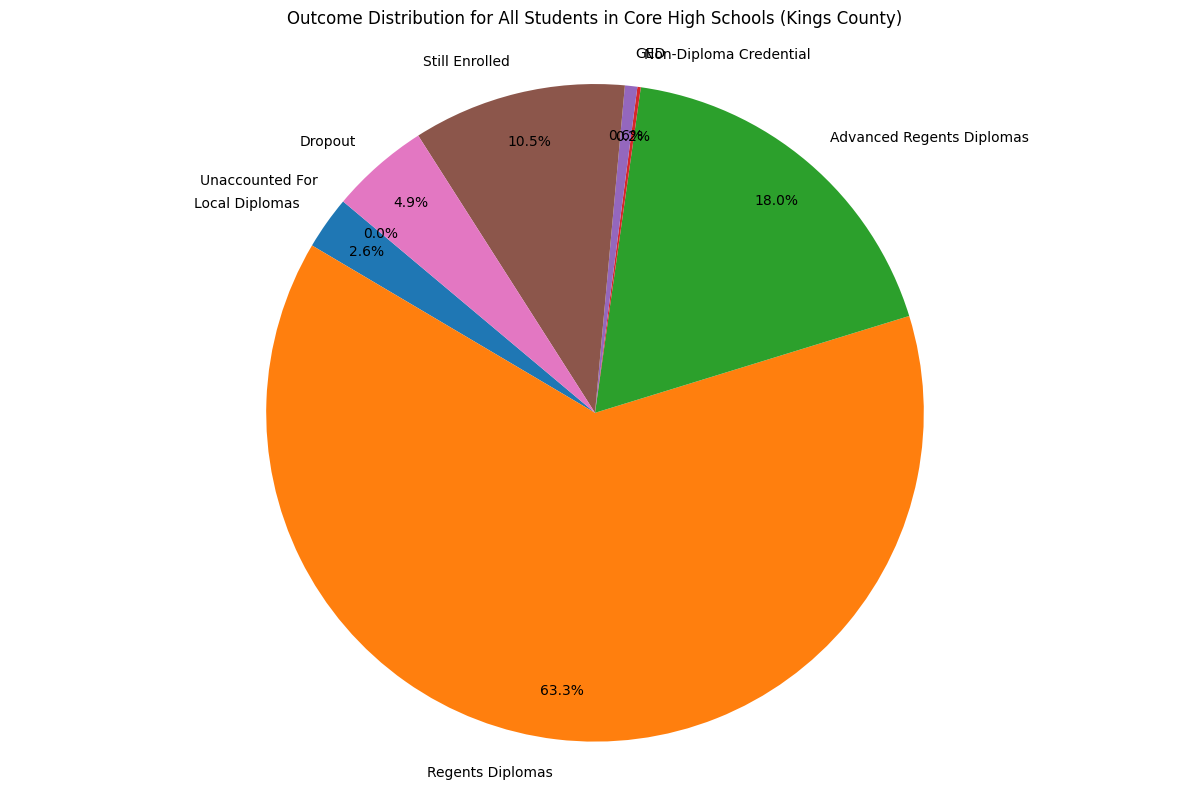

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for 'All Students' in Core High Schools and Kings County
core_kings_all_students = nyc_core_high_schools[
    (nyc_core_high_schools['subgroup_name'] == 'All Students') &
    (nyc_core_high_schools['county_name'] == 'KINGS')
].copy()

# Define the outcome columns and their corresponding labels
outcome_columns = {
    'local_cnt': 'Local Diplomas',
    'reg_cnt': 'Regents Diplomas',
    'reg_adv_cnt': 'Advanced Regents Diplomas',
    'non_diploma_credential_cnt': 'Non-Diploma Credential',
    'ged_cnt': 'GED',
    'still_enr_cnt': 'Still Enrolled',
    'dropout_cnt': 'Dropout'
}

# Calculate the total count for each outcome across all core high schools in Kings County for 'All Students'
core_kings_outcome_counts = {}
for col, label in outcome_columns.items():
    # Convert column to numeric, coercing errors, then sum
    core_kings_all_students[col] = pd.to_numeric(core_kings_all_students[col], errors='coerce').fillna(0)
    core_kings_outcome_counts[label] = core_kings_all_students[col].sum()

# Calculate 'unaccounted for' count
core_kings_total_enrolled = core_kings_all_students['enroll_cnt'].sum()
core_kings_accounted_for = sum(core_kings_outcome_counts.values())
core_kings_unaccounted_for_count = core_kings_total_enrolled - core_kings_accounted_for
core_kings_outcome_counts['Unaccounted For'] = core_kings_unaccounted_for_count

# Prepare data for the pie chart
core_kings_labels = core_kings_outcome_counts.keys()
core_kings_sizes = core_kings_outcome_counts.values()

# Create the pie chart for Core High Schools in Kings County
plt.figure(figsize=(12, 8))
plt.pie(core_kings_sizes, labels=core_kings_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Outcome Distribution for All Students in Core High Schools (Kings County)', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

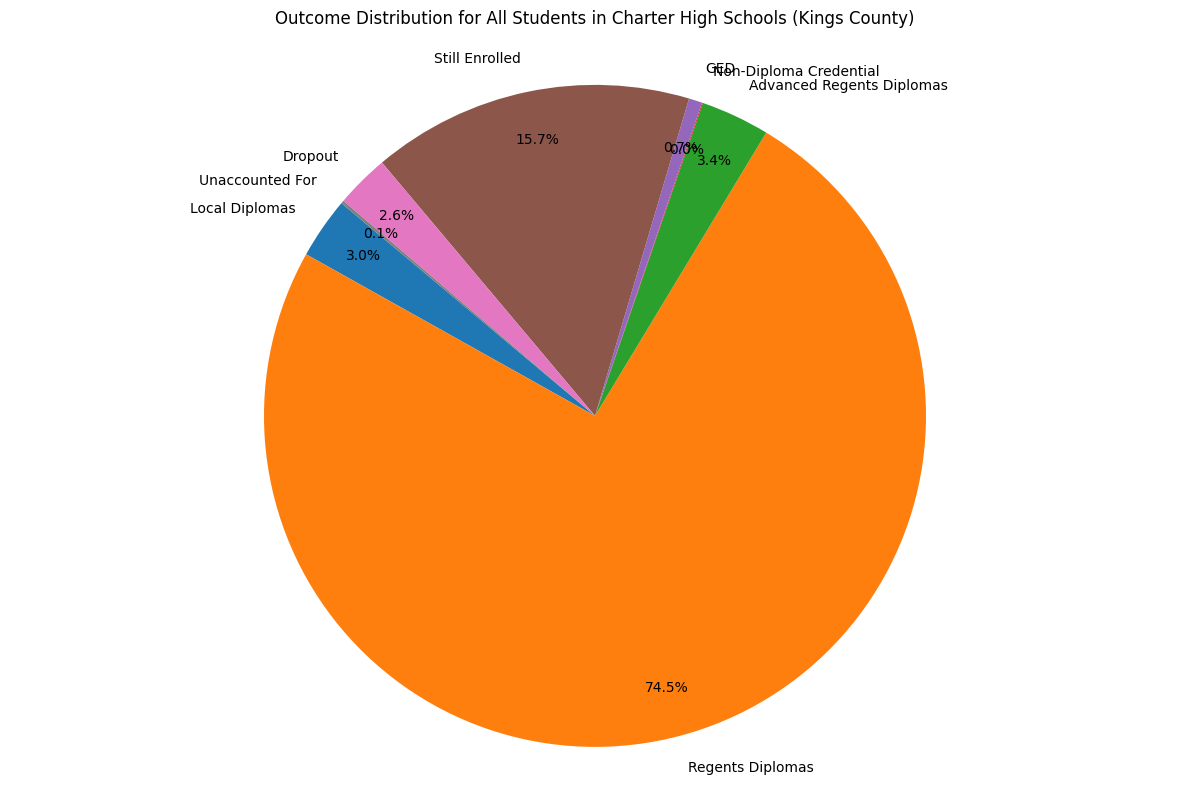

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for 'All Students' in Charter High Schools and Kings County
charter_kings_all_students = nyc_charter_high_schools[
    (nyc_charter_high_schools['subgroup_name'] == 'All Students') &
    (nyc_charter_high_schools['county_name'] == 'KINGS')
].copy()

# Define the outcome columns and their corresponding labels
outcome_columns = {
    'local_cnt': 'Local Diplomas',
    'reg_cnt': 'Regents Diplomas',
    'reg_adv_cnt': 'Advanced Regents Diplomas',
    'non_diploma_credential_cnt': 'Non-Diploma Credential',
    'ged_cnt': 'GED',
    'still_enr_cnt': 'Still Enrolled',
    'dropout_cnt': 'Dropout'
}

# Calculate the total count for each outcome across all charter high schools in Kings County for 'All Students'
charter_kings_outcome_counts = {}
for col, label in outcome_columns.items():
    # Convert column to numeric, coercing errors, then sum
    charter_kings_all_students[col] = pd.to_numeric(charter_kings_all_students[col], errors='coerce').fillna(0)
    charter_kings_outcome_counts[label] = charter_kings_all_students[col].sum()

# Calculate 'unaccounted for' count
charter_kings_total_enrolled = charter_kings_all_students['enroll_cnt'].sum()
charter_kings_accounted_for = sum(charter_kings_outcome_counts.values())
charter_kings_unaccounted_for_count = charter_kings_total_enrolled - charter_kings_accounted_for
charter_kings_outcome_counts['Unaccounted For'] = charter_kings_unaccounted_for_count

# Prepare data for the pie chart
charter_kings_labels = charter_kings_outcome_counts.keys()
charter_kings_sizes = charter_kings_outcome_counts.values()

# Create the pie chart for Charter High Schools in Kings County
plt.figure(figsize=(12, 8))
plt.pie(charter_kings_sizes, labels=charter_kings_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Outcome Distribution for All Students in Charter High Schools (Kings County)', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Within Kings County, both Core and Charter High Schools show a focus on Regents Diplomas. However, Core High Schools in Kings County have a higher proportion of students achieving Advanced Regents Diplomas, while Charter High Schools in Kings County have a higher percentage of students still enrolled after four years. These localized patterns within Kings County seem to largely reflect the differences observed at the overall NYC level between Core and Charter High Schools.

## Conclusion

This analysis of the 2020 Total Cohort graduation rates in NYC high schools reveals significant differences in subgroup representation, overall graduation rates, and student outcomes across Specialized, Core, and Charter school types. With a particular focus on Charter High Schools, the findings highlight their unique position within the NYC educational landscape.

**Key Findings:**

*   **Subgroup Representation in Charters:** Charter High Schools generally serve a higher percentage of students from traditionally underserved subgroups (Economically Disadvantaged, Students with Disabilities, Homeless, and In Foster Care) compared to Specialized High Schools, and often have slightly higher percentages than Core High Schools, with the exception of Students with Disabilities where percentages are similar to Core schools. This indicates that Charter schools play a significant role in educating students from these populations.
*   **Overall Graduation Rates in Charters:** While not reaching the exceptionally high rates of Specialized High Schools, Charter High Schools have overall graduation rates that are comparable to or slightly lower than Core High Schools.
*   **Subgroup Graduation Rates in Charters:** Similar to Core High Schools, Charter High Schools show a noticeable disparity in graduation rates between 'All Students' and the analyzed subgroups. Students with Disabilities, Homeless, and especially those in Foster Care face significantly lower graduation rates in Charter schools compared to their 'All Students' peers within the same school type. However, when comparing subgroup graduation rates directly, Specialized High Schools consistently outperform both Core and Charter schools for the subgroups where data is available.
*   **Outcome Distributions in Charters:** Charter High Schools have a significant percentage of students receiving Regents Diplomas. A key characteristic is the notably higher percentage of students who are still enrolled after four years compared to both Core and Specialized High Schools. The percentage of Advanced Regents Diplomas is lower than in Core and Specialized schools, and there is a percentage of dropouts present. This outcome distribution suggests a focus on getting students to a Regents diploma, but with a considerable proportion requiring more time to complete their studies.
*   **Localized Analysis (Kings County) and Lower-Performing Core Schools:** The analysis in Kings County reveals that within this borough, Charter High Schools also show a higher percentage of students still enrolled after four years compared to Core High Schools, while Core High Schools in Kings County have a higher proportion of students achieving Advanced Regents Diplomas. These localized patterns largely reflect the broader NYC differences between Core and Charter schools. The examination of Core High Schools with lower overall graduation rates highlights the challenges faced by a subset of Core schools, which have a distinctly different and less favorable outcome distribution compared to both all Core schools and Charter schools.

**Overall Conclusion:**

Charter High Schools in NYC play a crucial role in serving a significant proportion of students from underserved subgroups. While their overall graduation rates are comparable to Core High Schools, they face similar challenges in ensuring equitable graduation outcomes for these subgroups, with noticeable gaps between 'All Students' and subgroup graduation rates. A defining characteristic of Charter High Schools' outcomes is the higher percentage of students still enrolled after four years, suggesting a different pathway or timeline to graduation for a portion of their student population. In contrast, Specialized High Schools, while serving fewer students from these subgroups, achieve remarkably high graduation rates across the board.

The analysis underscores the need to continue exploring strategies to support the timely graduation of all students, particularly those from vulnerable subgroups in both Core and Charter schools. Understanding the factors contributing to the higher 'still enrolled' rate in Charter schools and addressing the significant disparities in graduation rates for subgroups like 'In Foster Care' and 'Homeless' across Core and Charter schools are critical steps towards improving educational equity in NYC.